In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Cargar el conjunto de datos de Iris
iris = datasets.load_iris()

# Crear un DataFrame con los datos de Iris
tempDF = pd.DataFrame(iris.data, columns=iris.feature_names)


iris.data
iris.keys()
iris['feature_names']
print(iris['DESCR']) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [72]:
print(tempDF.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


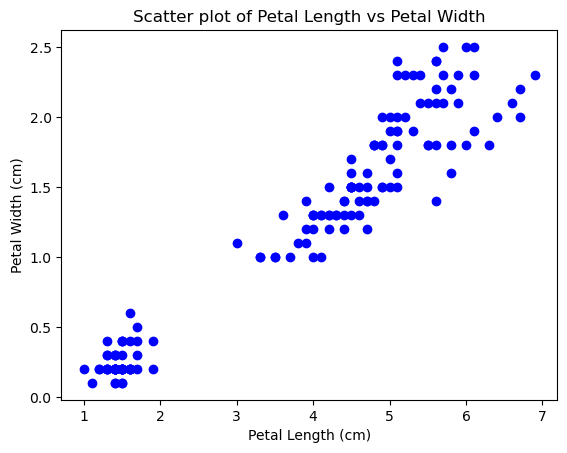

In [73]:

# Crear el gráfico de dispersión (scatter plot)
plt.scatter(tempDF['petal length (cm)'], tempDF['petal width (cm)'], c='blue')
plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Petal Width (cm)', fontsize=10)
plt.title('Scatter plot of Petal Length vs Petal Width', fontsize=12)
plt.show()

In [74]:
# También podríamos graficar otros datos con el largo del sépalo vs. ancho de sépalo.
# Figura 10. Paso 3 - largo del sépalo vs. ancho de sépalo

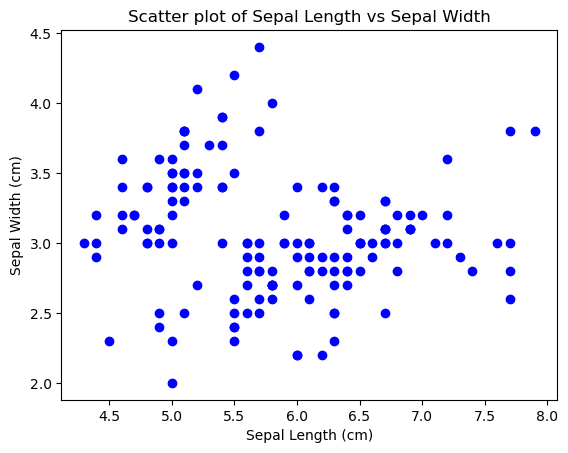

In [75]:

# Crear el gráfico de dispersión para largo del sépalo vs. ancho del sépalo
plt.scatter(tempDF['sepal length (cm)'], tempDF['sepal width (cm)'], c='blue')
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Sepal Width (cm)', fontsize=10)
plt.title('Scatter plot of Sepal Length vs Sepal Width', fontsize=12)
plt.show()


In [76]:
#Relacion positiva leve con cierta variabilidad de datos.

In [77]:
#Crear un objeto K-Means
from sklearn.cluster import KMeans

#Creado objeto k means con las condiciones iniciales
km= KMeans(n_clusters=5, n_init=10)


In [78]:
km

KMeans(n_clusters=5, n_init=10)

In [79]:
#“n_init”, corresponde al número de semillas con las cuales se hará funcionar la búsqueda de centroides

In [80]:
#Entrena modelo de datos
km=(km.fit(tempDF))
km


KMeans(n_clusters=5, n_init=10)

In [81]:
# El paso 6 consiste en revisar las características del modelo entrenado.

# Una vez entrenado el modelo, existen nuevas características que podemos observar a nivel de atributos:

#     cluster_centers_: Las coordenadas de los centroides. Si el algoritmo no converge estos no serán consistentes con los labels (etiquetas).
#     Inertia_: la suma total de la distancia que existe entre clústeres.
#     labels: Las etiquetas de cada punto (clústeres al cual pertenece cada dato).
#     n_iter_: número de iteraciones del algoritmo.

# En nuestro caso, se presentan los 5 centroides y sus puntos centrales del entrenamiento del algoritmo.

In [82]:
print(km.cluster_centers_)

[[7.475      3.125      6.3        2.05      ]
 [5.006      3.428      1.462      0.246     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.508      2.6        3.908      1.204     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]]


In [83]:
pd.DataFrame(km.cluster_centers_, columns=tempDF.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,7.475000,3.125000,6.300000,2.050000
1,5.006000,3.428000,1.462000,0.246000
2,6.529167,3.058333,5.508333,2.162500
3,5.508000,2.600000,3.908000,1.204000
4,6.207692,2.853846,4.746154,1.564103


In [84]:
# Respecto a la inercia que nos muestra la distancia entre los distintos clústeres, 
# podemos encontrar que es la que se visualiza en la siguiente figura

In [85]:
km.inertia_

46.446182051282065

In [86]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4,
       4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 4, 0, 2, 2, 0, 3, 0, 2, 0,
       2, 2, 2, 4, 2, 2, 2, 0, 0, 4, 2, 4, 0, 4, 2, 0, 4, 4, 2, 0, 0, 0,
       2, 4, 4, 0, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4], dtype=int32)

In [87]:
#Etiqueta para saber a que cluster pertenece cada dato

In [88]:
# crear una columna más a nuestro data frame para saber dentro de la división de nuestros 5 clústeres, 
# a cuál de ellos pertenece cada dato.

In [89]:
#creacion de columna cluster:

In [90]:
tempDF['cluster']= km.labels_ # se crea columna cluster para ver a cual corresponde cada una de las etiquetas
tempDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,4
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [91]:
#librería Plotnine nos ayudará para la creación de gráficos complejos a partir de los datos en un data frame

In [92]:
pip install plotnine



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [93]:
import plotnine as ptn
from plotnine import *

In [94]:
# definiremos la variable labels para poder marcar aquellas etiquetas con las cuales fueron categorizados los clústeres anteriormente.

In [95]:
labels =pd.Series(km.labels_, index=tempDF.index, dtype= 'category')


In [96]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    4
147    2
148    2
149    4
Length: 150, dtype: category
Categories (5, int32): [0, 1, 2, 3, 4]

In [97]:
#graficamos los valores anteriormente realizados, pero ahora agregamos color a cada una de las etiquetas marcadas anteriormente.

In [98]:
# Agregar color a las etiquetas

/Users/angel007/anaconda3/lib/python3.11/site-packages/plotnine/guides/guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


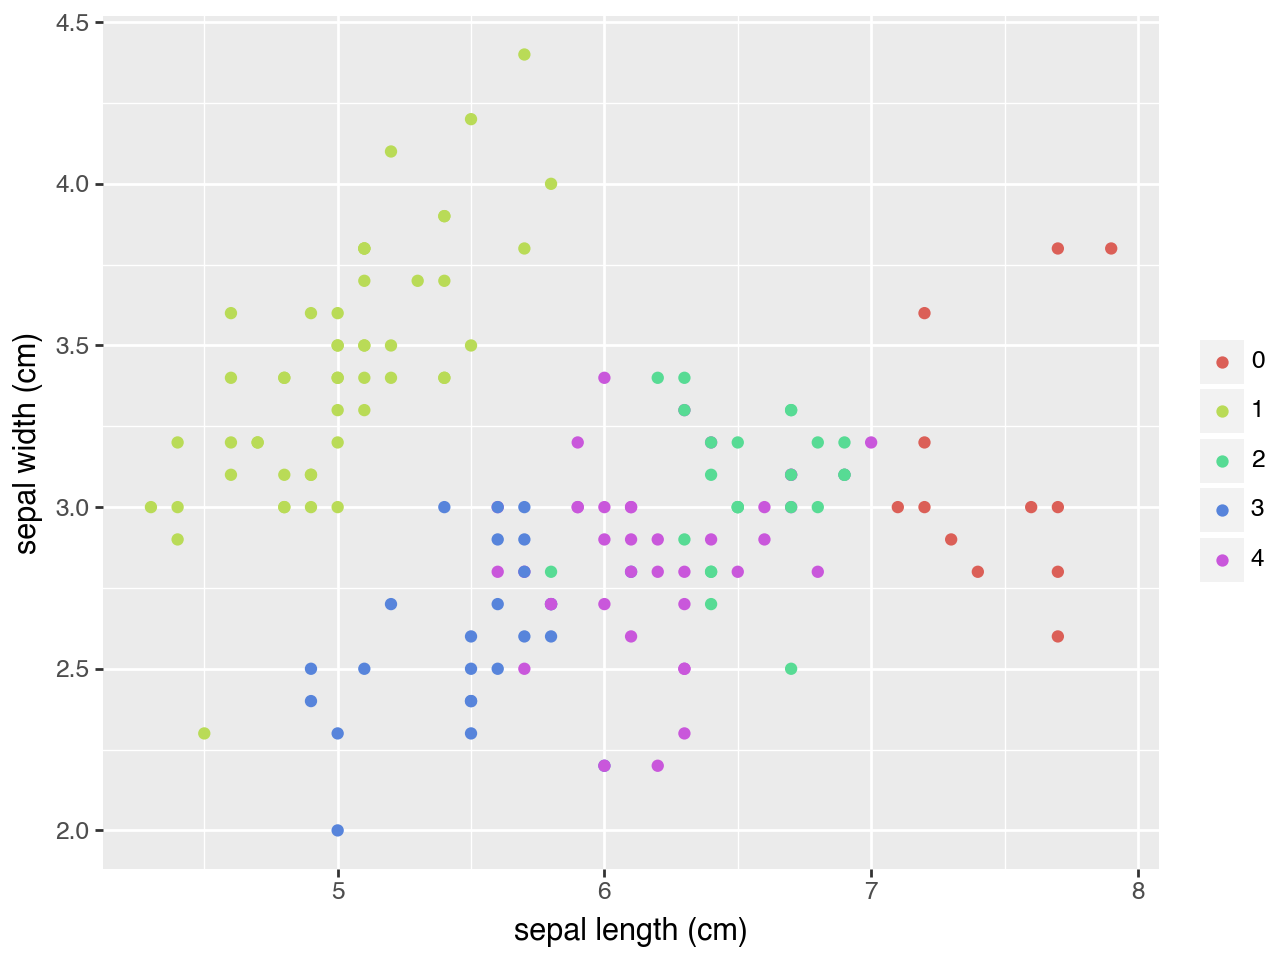

In [99]:
ggplot(tempDF, aes(x="sepal length (cm)", y="sepal width (cm)", color=labels)) + geom_point()

/Users/angel007/anaconda3/lib/python3.11/site-packages/plotnine/guides/guides.py:207: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


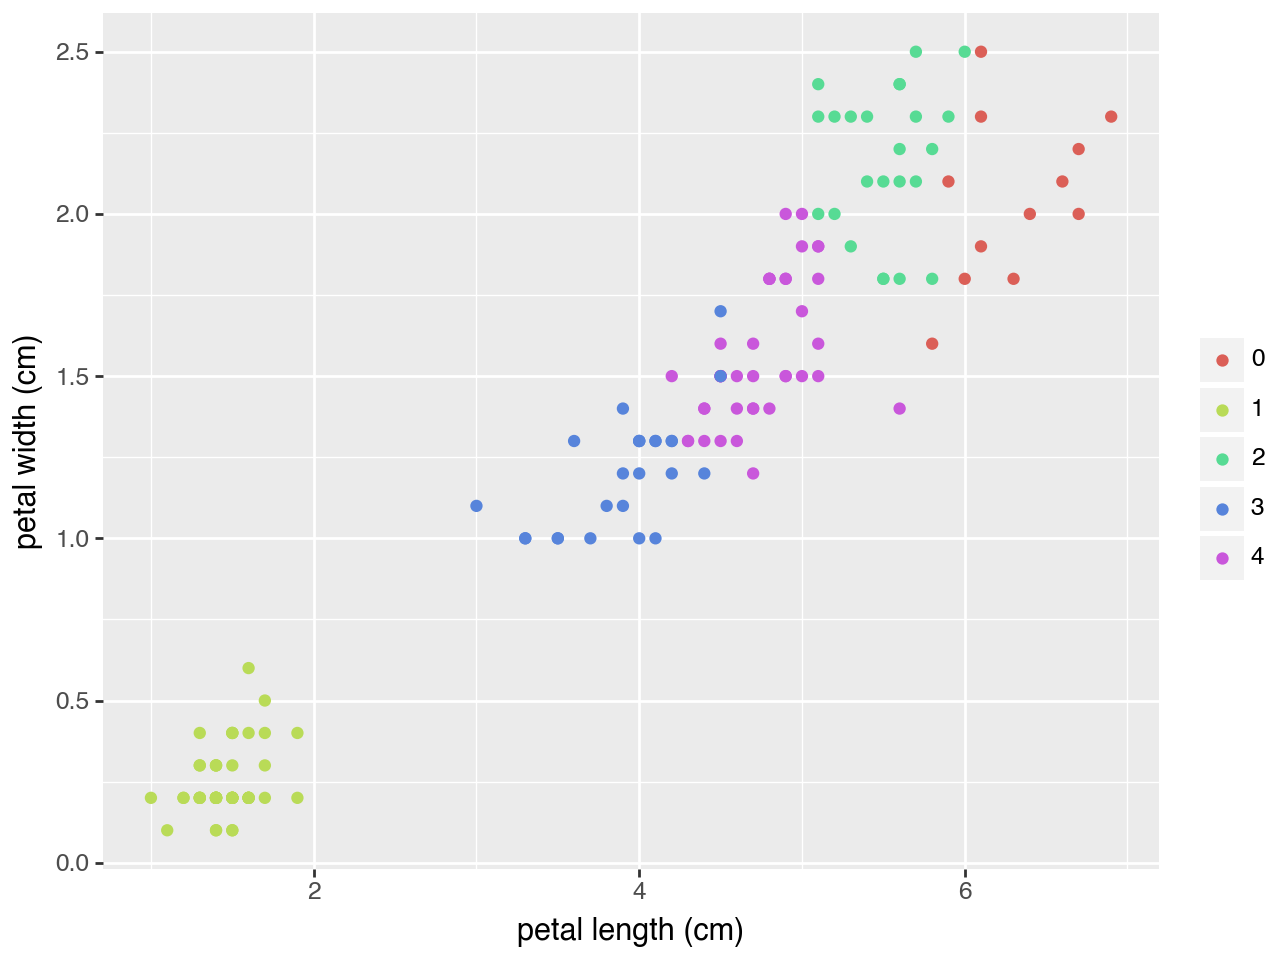

In [100]:
ggplot(tempDF, aes(x="petal length (cm)", y = "petal width (cm)", color=labels)) + geom_point()

In [101]:
# Con esto ya podemos tener una idea de qué manera se componen cada uno de los clústeres del set de datos en sus agrupaciones buscadas.

# Posteriormente, conoceremos el “método del codo” con el cual podremos determinar si realmente la cantidad de datos con los cuales estamos agrupando nuestro set de datos es el correcto o varía según su utilidad.

In [102]:
#visualización de clúster vía PCA 

In [103]:
import seaborn as sns
#Ejemplos dataset IRIS con PCA
iris= sns.load_dataset("iris")
iris= iris.loc[iris.species == "setosa"][["sepal_length", "sepal_width"]]
iris.head(2)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0


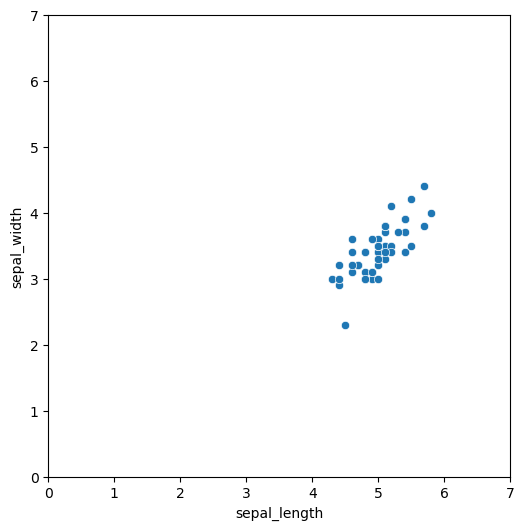

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(aspect="equal", xlim=(0, 7), ylim=(0, 7))

# Corrected scatterplot call with keyword arguments
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

plt.show()

In [105]:
# Ahora importamos la clase PCA e instanciamos el aprendiz especificando que el número de componentes a extraer es igual a 1.
# Instanciar el aprendiz

In [106]:
#INSTANCIAR EL APRENDIZ
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=0)

In [107]:
# Entrenamos y transformamos el dataset

iris_transformed= pca.fit_transform(iris)

In [108]:
iris_transformed


array([[ 0.1164805 ],
       [-0.38825857],
       [-0.37445282],
       [-0.51570561],
       [ 0.12338337],
       [ 0.6143167 ],
       [-0.29347212],
       [-0.02477229],
       [-0.79821119],
       [-0.31418074],
       [ 0.46616103],
       [-0.1591222 ],
       [-0.45543353],
       [-0.79130832],
       [ 0.95709436],
       [ 1.18623073],
       [ 0.6143167 ],
       [ 0.1164805 ],
       [ 0.74176374],
       [ 0.33871399],
       [ 0.24392754],
       [ 0.26463616],
       [-0.14531646],
       [-0.03167516],
       [-0.1591222 ],
       [-0.32108362],
       [-0.02477229],
       [ 0.18365546],
       [ 0.10957762],
       [-0.37445282],
       [-0.3813557 ],
       [ 0.24392754],
       [ 0.62812245],
       [ 0.90372515],
       [-0.31418074],
       [-0.17292795],
       [ 0.38518033],
       [ 0.05620842],
       [-0.72413336],
       [ 0.04240267],
       [ 0.04930554],
       [-1.17550322],
       [-0.5759777 ],
       [ 0.04930554],
       [ 0.33871399],
       [-0

In [109]:
# En la variable iris_transformed tenemos los datos transformados que, en este caso, son datos en una estructura de una dimensión.
# Variable iris_transformed

In [110]:
iris_transformed[:5, :]

array([[ 0.1164805 ],
       [-0.38825857],
       [-0.37445282],
       [-0.51570561],
       [ 0.12338337]])

In [111]:
# Si quisiéramos, podríamos mostrar estos puntos en el eje x de un espacio bidimensional.
# Espacio bidimensional

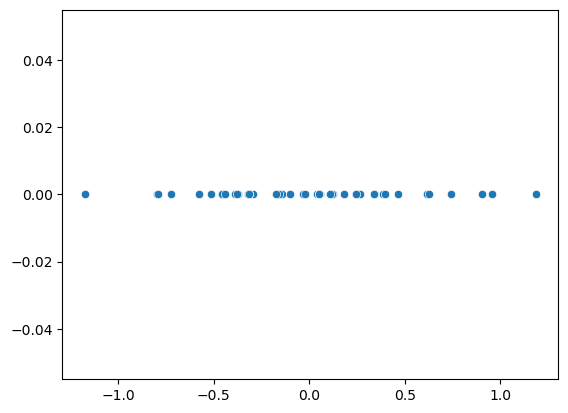

In [112]:

sns.scatterplot(x=iris_transformed.flatten(), y=[0] * len(iris_transformed.flatten()))
plt.show()

In [113]:
# Sin embargo, lo más interesante es mostrarlos directamente sobre la recta del primer componente principal. Para ello podemos usar el método inverse_transform de PCA que transforma los datos al espacio original.
# Método inverse_transform de PCA

In [114]:
iris_o_transformed = pca.inverse_transform(iris_transformed)
iris_o_transformed

array([[5.08424572, 3.51428623],
       [4.74518747, 3.14038647],
       [4.75446148, 3.15061347],
       [4.65957498, 3.04597646],
       [5.08888273, 3.51939973],
       [5.41866698, 3.88307249],
       [4.80886023, 3.21060222],
       [4.98935922, 3.40964922],
       [4.46980198, 2.83670246],
       [4.79494922, 3.19526172],
       [5.31914347, 3.77332199],
       [4.89910973, 3.31012572],
       [4.70006272, 3.09062472],
       [4.47443898, 2.84181596],
       [5.64892772, 4.13699475],
       [5.80284998, 4.306734  ],
       [5.41866698, 3.88307249],
       [5.08424572, 3.51428623],
       [5.50427947, 3.97748249],
       [5.23353098, 3.67891198],
       [5.16985822, 3.60869623],
       [5.18376923, 3.62403673],
       [4.90838373, 3.32035272],
       [4.98472222, 3.40453572],
       [4.89910973, 3.31012572],
       [4.79031222, 3.19014822],
       [4.98935922, 3.40964922],
       [5.12937047, 3.56404798],
       [5.07960872, 3.50917273],
       [4.75446148, 3.15061347],
       [4.

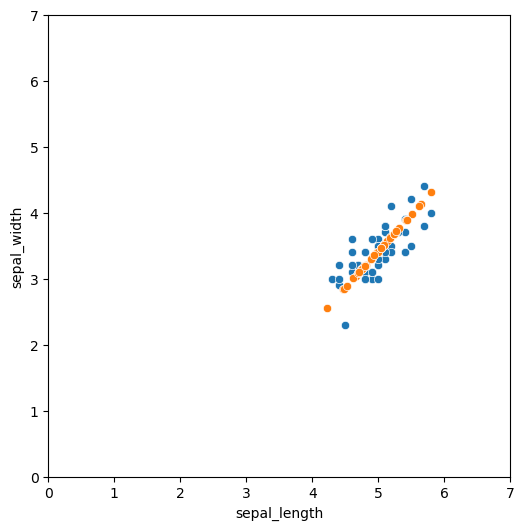

In [115]:
import numpy as np

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(aspect="equal", xlim=(0, 7), ylim=(0, 7))

# Corrected scatterplot call with keyword arguments and proper data reference
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris)

# Another scatterplot with transformed data
sns.scatterplot(x=iris_o_transformed[:, 0], y=iris_o_transformed[:, 1])

plt.show()

In [116]:
#METODO DEL CODO

/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/Users/angel007/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_

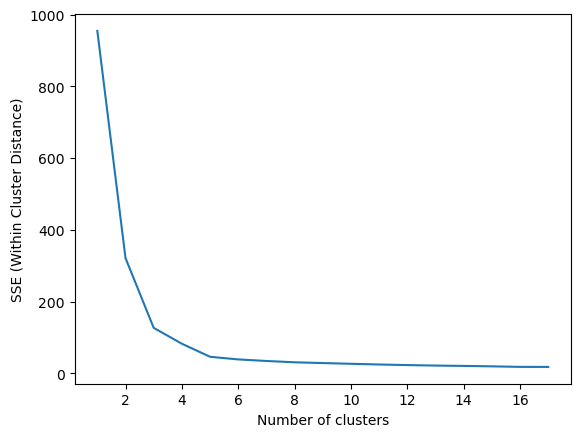

In [117]:
from sklearn.cluster import KMeans

sse = []  # Variable para guardar el within cluster distance

numK = 18

for k in range(1, numK):  # Numero de cluster a probar
    # Creando el modelo, entrenandolo y obteniendo el valor del within cluster distance
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tempDF)
    sse.append(kmeans.inertia_)

# Optional: To visualize the results
import matplotlib.pyplot as plt

plt.plot(range(1, numK), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Within Cluster Distance)')
plt.show()

<Axes: >

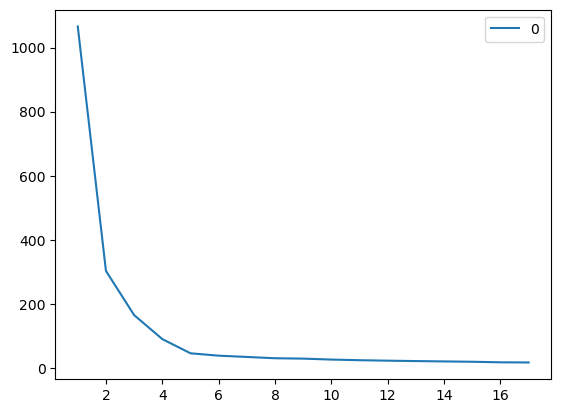

In [70]:
pd.DataFrame(sse, index=np.arange(1, numK)).plot()


In [ ]:
# De esta forma, la interpretación es a elección del analista de datos, 
# al parecer el quiebre más significativo de los datos ocurre cuando el número de clústeres es 5. 
# Justamente, con los datos que comenzamos a trabajar al comienzo de nuestro ejercicio.
